# Exercise 3: Data Cubes

Comp 4431

Edwin Bosch, Cara Lachenmayer and Carly Raskin 

## Setup

In [ ]:
from google.colab import drive

google_drive_root='Lab03'
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/Data Mining/' + google_drive_root + '/'
drive.mount(google_drive_mount_location)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carly/Cara's version

from google.colab import drive
google_drive_root='Lab03'
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'
drive.mount(google_drive_mount_location)


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# create dummy variables and functions
locations = ['SouthGlenn','Tamarac','HighlandsRanch','ColoradoBlvd',
             'WashingtonPark','CherryCreek','GovernorsRanch','UnionStation',
             'CastleRock']
itemCategories = ['produce','meat','bakery','freezer','dairy','deli','snack',
                  'softdrinks','beer','household']
col_list = ["transaction_id","num_items","total_price","date","store",
            "category"]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
def getMonth(inDate):
    return(int(inDate[5:7]))

# initialize cubes
cube0 = np.zeros((len(months),len(locations),len(itemCategories)))
cube1 = np.zeros((len(months),len(locations),len(itemCategories)))


## Data Load

In [ ]:
dat = pd.read_csv(google_file_prefix + "ds_ex3.csv", names=col_list)
print(dat.head())
print(dat["date"][0].__class__)

FileNotFoundError: ignored

In [ ]:
# populate the cubes
for i in range(len(dat)):
  # get month. Need the -1 to acount for January being 0
  a = getMonth(dat["date"][i]) - 1
  b = locations.index(dat["store"][i])
  c = itemCategories.index(dat["category"][i])
  # note: b and c grow inefficient as those lists become too large
  cube0[a][b][c] = dat["num_items"][i]
  cube1[a][b][c] = dat["total_price"][i]

print(cube0.shape)

(12, 9, 10)


In [ ]:
# start breaking apart the cubes into squares
# convert to pandas for graphing/sns
square0 = pd.DataFrame(cube0[:, :, 0], columns=locations)
square1 = pd.DataFrame(cube0[:, 0, :], columns=itemCategories)
square2 = pd.DataFrame(cube0[0, :, :], columns=itemCategories)
square3 = pd.DataFrame(cube1[:, :, 0], columns=locations)
square4 = pd.DataFrame(cube1[:, 0, :], columns=itemCategories)
square5 = pd.DataFrame(cube1[0, :, :], columns=itemCategories)

print(square0.shape)
print(square1.shape)
print(square2.shape)

(12, 9)
(12, 10)
(9, 10)


# Graphs

Text(0.5, 1.0, 'Number of items')

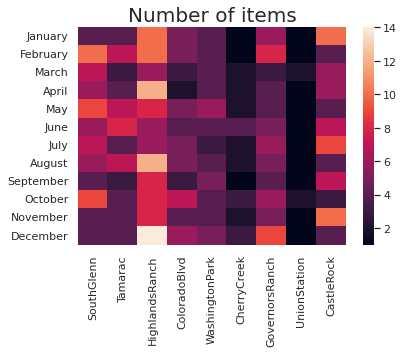

In [ ]:
# data is too sparce for pairplots to be meaningful
p = sns.heatmap(square0, yticklabels=months)
p.set_title("Number of items", fontsize=20)


Text(0.5, 1.0, 'Total amount sold')

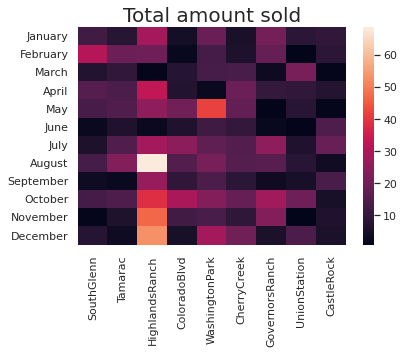

In [ ]:
p = sns.heatmap(square3, yticklabels=months)
p.set_title("Total amount sold", fontsize=20)

Text(0.5, 1.0, 'Number of items')

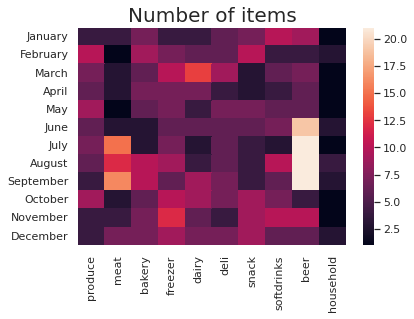

In [ ]:
p = sns.heatmap(square1, yticklabels=months)
p.set_title("Number of items", fontsize=20)

Text(0.5, 1.0, 'Total amount sold')

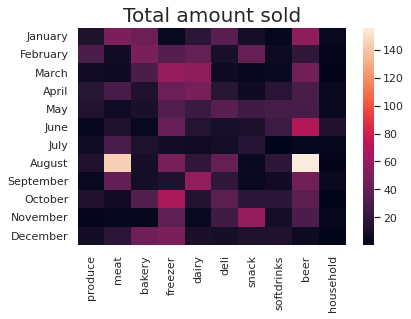

In [ ]:
p = sns.heatmap(square4, yticklabels=months)
p.set_title("Total amount sold", fontsize=20)

Text(0.5, 1.0, 'Number of items')

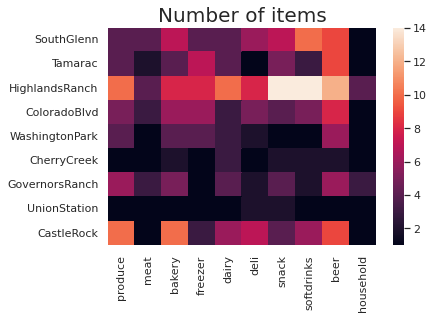

In [ ]:
p = sns.heatmap(square2, yticklabels=locations)
p.set_title("Number of items", fontsize=20)

Text(0.5, 1.0, 'Total amount sold')

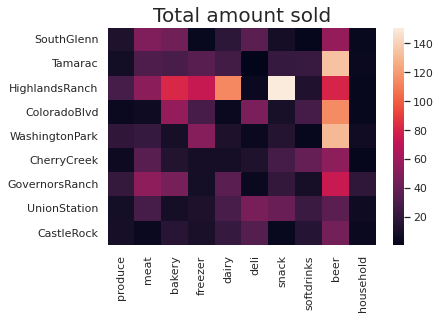

In [ ]:
p = sns.heatmap(square5, yticklabels=locations)
p.set_title("Total amount sold", fontsize=20)

##  Relationships and Analysis

Looks like people in highlands ranch like to shop in larger number of items and larger amounts year round. Union Station has few items sold. Beer is always popular but extremely so in August and September (summer months). Highlands ranch sells a lot of snacks and soft drinks.